## Importando bibliotecas

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
stroke_df = pd.read_csv('dataset/train.csv')
stroke_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0


In [53]:
stroke_df.shape

(15304, 12)

*Dataset possui 15304 linhas e 12 colunas*

## Análise dos Dados

In [54]:
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15304 entries, 0 to 15303
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 15304 non-null  int64  
 1   gender             15304 non-null  object 
 2   age                15304 non-null  float64
 3   hypertension       15304 non-null  int64  
 4   heart_disease      15304 non-null  int64  
 5   ever_married       15304 non-null  object 
 6   work_type          15304 non-null  object 
 7   Residence_type     15304 non-null  object 
 8   avg_glucose_level  15304 non-null  float64
 9   bmi                15304 non-null  float64
 10  smoking_status     15304 non-null  object 
 11  stroke             15304 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 1.4+ MB


*Sem valores nulos no dataset*

## Ajustando tipo dos dados

In [55]:
colunas_para_converter_cat = ['gender', 'ever_married', 'work_type','Residence_type','smoking_status']
stroke_df[colunas_para_converter_cat] = stroke_df[colunas_para_converter_cat].astype('category')
stroke_df['age'] = stroke_df['age'].astype('int64')

## Excluir a coluna id

In [56]:
stroke_df = stroke_df.drop(['id'], axis=1)

## Descrição geral dos dados

In [57]:
stroke_df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,15304,3,Female,9446,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,15304.0,NaN,NaN,NaN,41.404012,21.470463,0.0,26.0,43.0,57.0,82.0
hypertension,15304.0,NaN,NaN,NaN,0.049726,0.217384,0.0,0.0,0.0,0.0,1.0
heart_disease,15304.0,NaN,NaN,NaN,0.023327,0.150946,0.0,0.0,0.0,0.0,1.0
ever_married,15304,2,Yes,10385,NaN,NaN,NaN,NaN,NaN,NaN,NaN
work_type,15304,5,Private,9752,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Residence_type,15304,2,Rural,7664,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg_glucose_level,15304.0,NaN,NaN,NaN,89.039853,25.476102,55.22,74.9,85.12,96.98,267.6
bmi,15304.0,NaN,NaN,NaN,28.112721,6.722315,10.3,23.5,27.6,32.0,80.1
smoking_status,15304,4,never smoked,6281,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
stroke_df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000
mean,41.404012,0.049726,0.023327,89.039853,28.112721,0.041296
std,21.470463,0.217384,0.150946,25.476102,6.722315,0.198981
min,0.000000,0.000000,0.000000,55.220000,10.300000,0.000000
25%,26.000000,0.000000,0.000000,74.900000,23.500000,0.000000
50%,43.000000,0.000000,0.000000,85.120000,27.600000,0.000000
75%,57.000000,0.000000,0.000000,96.980000,32.000000,0.000000
max,82.000000,1.000000,1.000000,267.600000,80.100000,1.000000


## Correlação entre as colunas numéricas

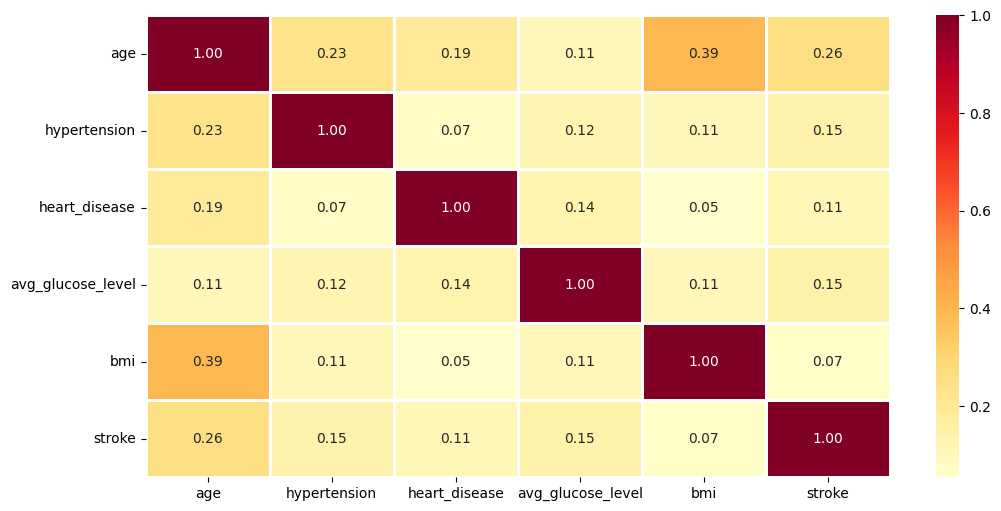

In [59]:
numeric_columns = stroke_df.select_dtypes(include=['number'])

plt.figure(figsize=(12, 6))
sns.heatmap(numeric_columns.corr(),
            cmap='YlOrRd',
            fmt='.2f',
            linewidths=2,
            annot=True)
plt.show()



## Disribuição das colunas numéricas

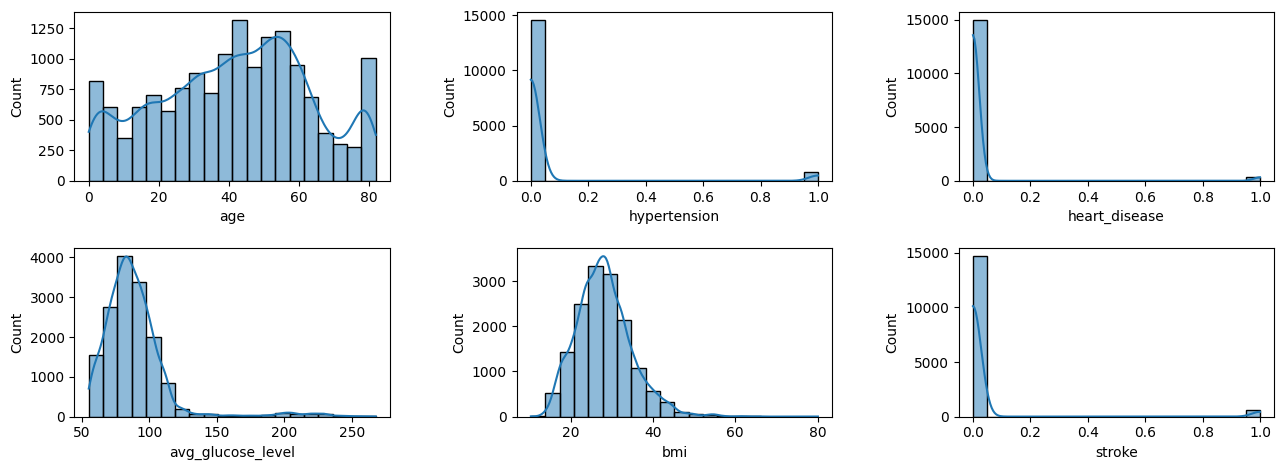

In [78]:
plt.figure(figsize = (15, 8))
number = 1
row = 3
for i in numeric_columns:
    plt.subplot(row, 3, number)
    sns.histplot(data=stroke_df, x=stroke_df[i], kde=True, bins=20) 
    number += 1
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.4, hspace=0.4)

   

## Colunas categóricas

C:\Users\User\AppData\Local\Temp\ipykernel_7604\3264409188.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


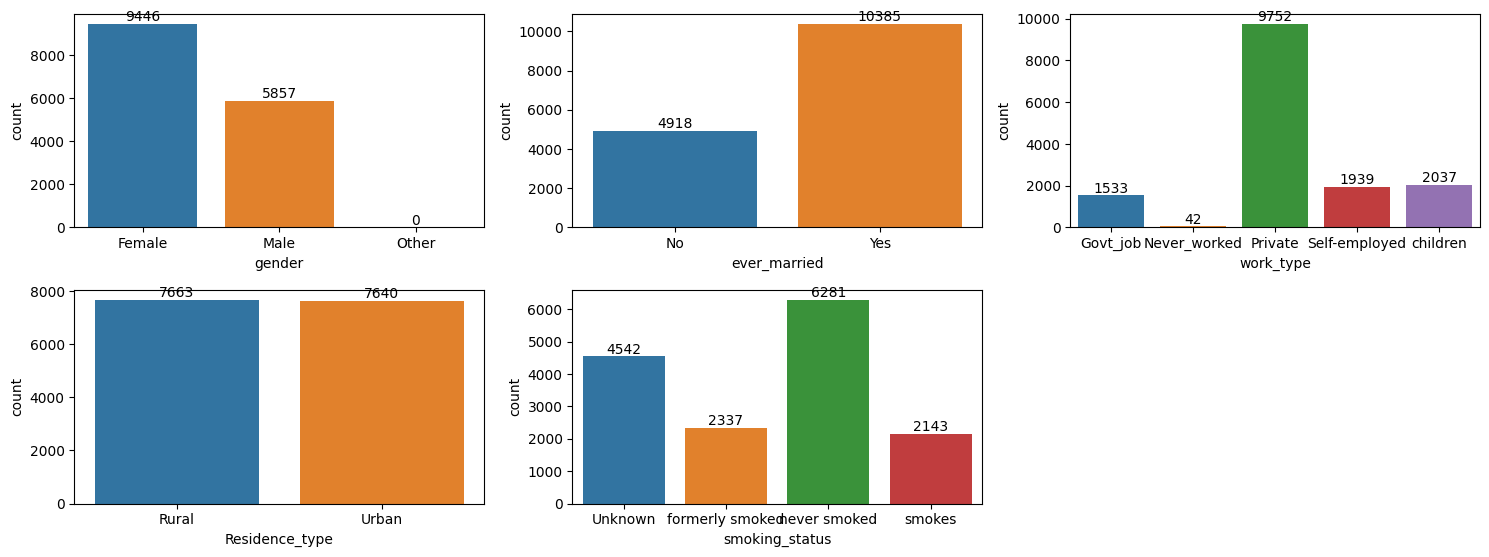

In [74]:
categoric_columns = stroke_df.select_dtypes(exclude=['number'])

plt.figure(figsize = (15, 8))
number = 1
row = 3
for i in categoric_columns:
    plt.subplot(row, 3, number)
    ax = sns.countplot(x=i, data=stroke_df)
    ax.bar_label(ax.containers[0])
    number += 1
    plt.tight_layout()

## Retirando a linha referente ao gênero = Other

In [66]:
stroke_df = stroke_df[stroke_df['gender'] != 'Other']

In [67]:
for i in categoric_columns:
    formatted_values = (stroke_df[i].value_counts(normalize=True)*100).apply(lambda x: f'{x:.2f}%')
    print(formatted_values)
    print('------------------------------')   

gender
Female    61.73%
Male      38.27%
Other      0.00%
Name: proportion, dtype: object
------------------------------
ever_married
Yes    67.86%
No     32.14%
Name: proportion, dtype: object
------------------------------
work_type
Private          63.73%
children         13.31%
Self-employed    12.67%
Govt_job         10.02%
Never_worked      0.27%
Name: proportion, dtype: object
------------------------------
Residence_type
Rural    50.08%
Urban    49.92%
Name: proportion, dtype: object
------------------------------
smoking_status
never smoked       41.04%
Unknown            29.68%
formerly smoked    15.27%
smokes             14.00%
Name: proportion, dtype: object
------------------------------


## Análise do Target

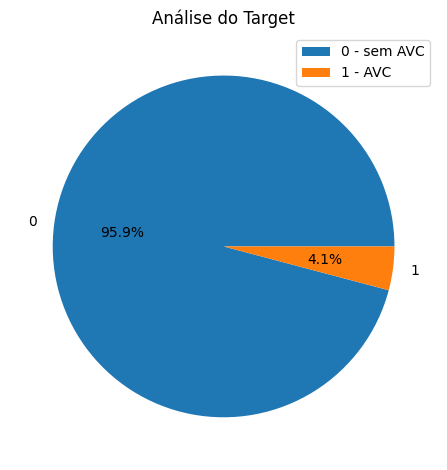

In [85]:
stroke_df.groupby('stroke').size().plot(kind='pie', autopct='%.1f%%')
legend_labels = ['0 - sem AVC', '1 - AVC']
plt.legend(legend_labels, loc='best')
plt.title('Análise do Target')
plt.ylabel("")
plt.tight_layout()

In [88]:
stroke_df['stroke'].value_counts()

stroke
0    14671
1      632
Name: count, dtype: int64

*Notamos que apenas 4.1% dos dados, 632 de 15.303, são com positivo para AVC*